In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [54]:
train_set = torchvision.datasets.MNIST(
    root='./data/MNIST',train=True,download=True,
    transform=transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)

test_set = torchvision.datasets.MNIST(
    root='./data/MNIST',train=False,download=True,
    transform=transforms.Compose([transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(test_set,batch_size=100)

classes = ('1','2','3','4','5','6','7','8','9','10')

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])


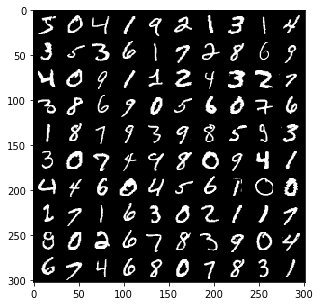

In [55]:
images,labels = next(iter(train_loader))

grid = torchvision.utils.make_grid(images,nrow=10)

plt.figure(figsize=(5,5))
plt.imshow(np.transpose(grid,(1,2,0)))

print(labels)

In [27]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self,t):
        t = F.max_pool2d(F.relu(self.conv1(t)), kernel_size=2, stride=2)
        t = F.max_pool2d(F.relu(self.conv2(t)), kernel_size=2, stride=2)
        
        t = F.relu(self.fc1(t.reshape(-1, 12 * 4 * 4)))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        
        return t

In [32]:
network = Network()

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.001, momentum=0.9)

In [36]:
for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: 
        images, labels = batch
        
        optimizer.zero_grad()
        
        preds = network(images) 
        loss = criterion(preds, labels) 
        loss.backward() 
        optimizer.step() 

        total_loss += loss.item()

    print(
        "epoch", epoch, 
        "loss:", total_loss
    )

epoch 0 loss: 1373.1339273452759
epoch 1 loss: 861.4354905486107
epoch 2 loss: 251.35442724823952
epoch 3 loss: 172.34488404542208
epoch 4 loss: 131.98467201553285
epoch 5 loss: 105.92379412613809
epoch 6 loss: 88.78192999679595
epoch 7 loss: 76.79657386057079
epoch 8 loss: 68.25080034229904
epoch 9 loss: 61.864680947735906


In [116]:
def get_accuracy():
    correct = 0
    
    for data in test_loader:
        test_imgs,test_labels = data
        predictions = network(test_imgs)
        _, predicted = torch.max(predictions, 1)

        for pred,label in zip(test_labels,predicted):
            if pred == label:
                correct +=1
            else:
                pass
    
    print('Accuracy: {}%'.format(round(correct/len(test_set)*100),4))

In [117]:
get_accuracy()

Accuracy: 97%
